<a href="https://colab.research.google.com/github/Chryron/CSC2516_NN-DL/blob/main/CSC2516_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

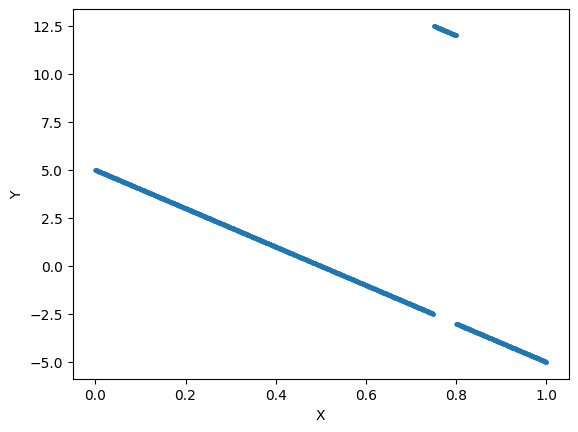

In [71]:
x, y = generate_data()
plt.scatter(x, y, s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

There is a sudden spike in y values between x=0.75 and x=0.8. The data is otherwise linear.

# 2. Implement linear regression (2.5 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

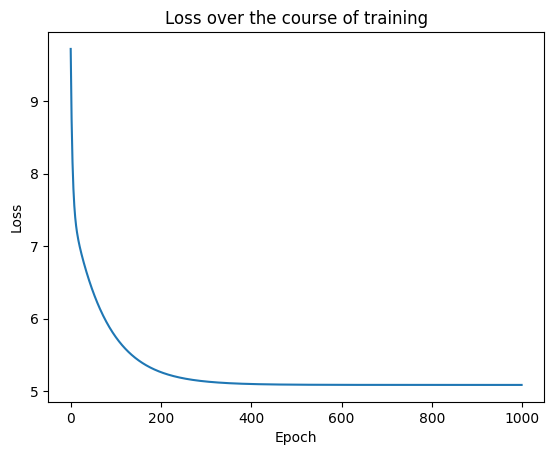

In [72]:
m = np.random.randn()
b = np.random.randn()
learning_rate = 0.1
num_epochs = 1000
losses = []

def squared_error_loss(y_pred, y_true):
    return (0.5 * (y_pred - y_true) ** 2).mean()

for epoch in range(num_epochs):
    y_pred = m * x + b

    loss = squared_error_loss(y_pred, y)
    losses.append(loss)
    gradient_m = ((y_pred - y) * x).mean()
    gradient_b = (y_pred - y).mean()
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b


plt.plot(range(num_epochs), losses)
plt.title("Loss over the course of training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


-7.517182766814783 4.50822858643518


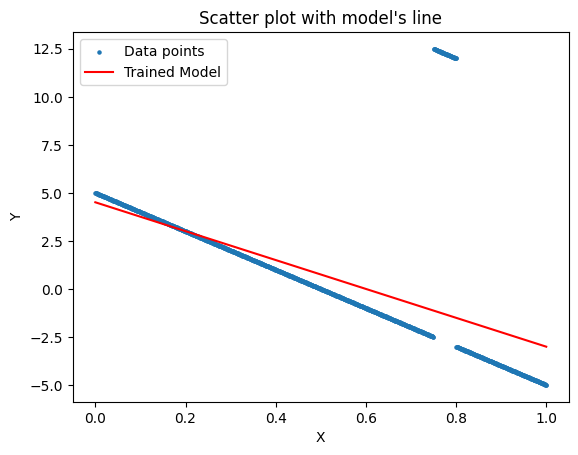

In [73]:
print(m, b)
# Plotting the data and the model's line
plt.scatter(x, y, s=5, label="Data points")
plt.plot(x, m*x + b, color='red', label="Trained Model")
plt.title("Scatter plot with model's line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

The ground truth values of m and b are -10 and 5 respectively. The trained values of m and b are close to the ground truth but there is an observable difference. The plot makes the difference more clear. The trained values fit most of the data pretty well except for the sudden spike in data between 0.75 and 0.8. Since we are trying to minimise the squared error, the training attempts to sacrifice fitting the general linear trend in order to better fit the spike and this leads to the deviation of the weight and bias from the ground truth values.

# 4. "Robust" linear regression (1 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

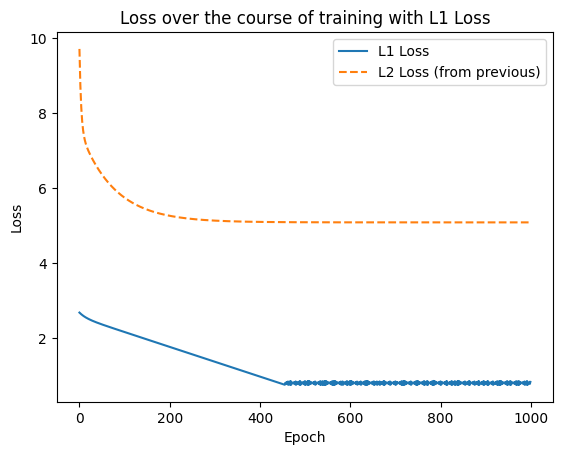

In [74]:
m = np.random.randn()
b = np.random.randn()
learning_rate = 0.1
num_epochs = 1000
losses_l1 = []

def l1_loss(y_pred, y_true):
    return np.abs(y_pred - y_true).mean()

for epoch in range(num_epochs):
    y_pred = m * x + b

    loss = l1_loss(y_pred, y)
    losses_l1.append(loss)
    gradient_m = (np.sign(y_pred - y)*x).mean()
    gradient_b = np.sign(y_pred - y).mean()
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

plt.plot(losses_l1, label="L1 Loss")
plt.plot(losses, linestyle='--', label="L2 Loss (from previous)")
plt.title("Loss over the course of training with L1 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


The L2 loss converges much quicker in the intial epochs compared to L1. The L1 loss also has many oscillations and it cannot reach an equilibrium or a minimum whereas the L2 loss does. The minimum L1 loss is also much less than the minimum L2 loss. The oscillations are due to the gradients of m and b being non-zero when the L2 loss is minimum. Since even at a minimum non-zero loss the gradients are not zero, due to the sign function. The trajectory of the L2 loss is also asymptotic whereas the L1 loss is more linear and this makes sense since for L2 loss, as the loss approaches the minima, the change in parameters becomes smaller and smaller. This is not the case for L1. 

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

-9.995971304613702 4.981155119167715


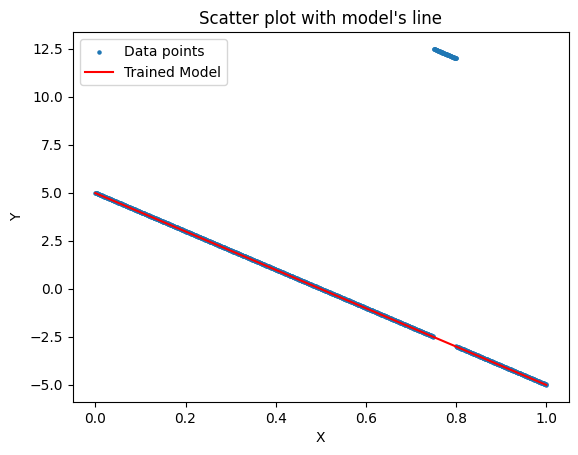

In [75]:
print(m, b)
# Plotting the data and the model's line
plt.scatter(x, y, s=5, label="Data points")
plt.plot(x, m*x + b, color='red', label="Trained Model")
plt.title("Scatter plot with model's line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

The trained w and b are significantly closer to the ground truth values now. The L1 loss does not penalise large deviations as heavily as the L2 loss and therefore the trained model was able to better approximate the linear trend, ignoring the spike in data. 